## ASAS-SN SkyPatrol Python API Demo

The pyasassn client allows users to query the ASAS-SN input catalog and retrieve light curves from our database. These light curves are subject to live updates as we are running continuous photometry on our nightly images.



### Installation

Make sure your pip points to the appropriate Python >= 3.6 installation...
<pre><code>
    git clone https://github.com/asas-sn/skypatrol.git
    pip3 install skypatrol/ 
</code></pre>

### Tutorial

Create a SkyPatrolClient object. The client will automatically ping the server for the most recent catalog data.

In [1]:
from pyasassn.client import SkyPatrolClient

client = SkyPatrolClient()
client.catalogs


Table Name:  stellar_main
Num Columns: 47
Num Targets: 98932961

Table Name:  master_list
Num Columns: 4
Num Targets: 106483451

Table Name:  asassn_discoveries
Num Columns: 11
Num Targets: 5716

Table Name:  comets
Num Columns: 1
Num Targets: 1825

Table Name:  swift
Num Columns: 56
Num Targets: 254936

Table Name:  allwiseagn
Num Columns: 15
Num Targets: 1354900

Table Name:  mdwarf
Num Columns: 32
Num Targets: 8927

Table Name:  glade_tmassx
Num Columns: 20
Num Targets: 1125414

Table Name:  glade_gwgc
Num Columns: 20
Num Targets: 52399

Table Name:  glade_pgc
Num Columns: 20
Num Targets: 52400

Table Name:  glade_hyperleda
Num Columns: 20
Num Targets: 2459906

Table Name:  glade_sdssqso
Num Columns: 20
Num Targets: 297152

Table Name:  milliquas
Num Columns: 21
Num Targets: 1979676

Table Name:  fermi
Num Columns: 67
Num Targets: 5788

Table Name:  aavsovsx
Num Columns: 28
Num Targets: 1437528

Table Name:  morx
Num Columns: 38
Num Targets: 1121954

Table Name:  chandra
Num Column

#### Main Catalog

The __stellar_main__ catalog contains the bulk of our targets. It was built off of ATLAS REFCAT2 and contains GAIA, TESS, SDSS, and ALLWISE identifiers where available.

In [12]:
client.catalogs.stellar_main.head(12)

,col_names,dtypes
0,asas_sn_id,bigint
1,ra_deg,double
2,dec_deg,double
3,refcat_id,bigint
4,gaia_id,bigint
5,hip_id,string
6,tyc_id,string
7,tmass_id,string
8,sdss_id,string
9,allwise_id,string


#### HEASARC Catalogs

The remaining catalogs were sourced from NASA's HEASARC archive. Each of these retains its original columnar data, though we have appended an __asas_sn_id__ for all of them.

In [13]:
client.catalogs.aavsovsx.head(12)

,col_names,dtypes
0,asas_sn_id,bigint
1,ra_deg,double
2,dec_deg,double
3,source_number,bigint
4,name,string
5,variability_flag,bigint
6,lii,double
7,bii,double
8,variability_type,string
9,max_mag_type,double


#### The Master List

The __master_list__ contains __asas_sn_ids__ coordinates and catalog sources for all of our targets. All of our catalogs are cross-matched on the master list with a 2-arcsecond cone. 

In [4]:
client.catalogs.master_list

,col_names,dtypes
0,asas_sn_id,bigint
1,ra_deg,double
2,dec_deg,double
3,catalog_sources,array<string>


### Cone Seach

Lets run a simple cone-search on the master list. 

In [14]:
client.cone_search(ra_deg=270, dec_deg=88, radius=4, catalog='master_list')

,asas_sn_id,ra_deg,dec_deg,catalog_sources
0,8590691309,279.402671,84.054321,"[stellar_main, tic]"
1,8590690638,261.294972,84.053901,"[stellar_main, tic]"
2,8590690848,268.943958,84.054287,"[stellar_main, tic]"
3,8590691303,276.086841,84.054183,"[stellar_main, tic]"
4,661431470018,280.022222,84.054444,[morx]
...,...,...,...,...
83605,317828641863,68.749576,89.496094,"[stellar_main, tic]"
83606,317828642017,201.397819,89.495696,"[stellar_main, tic]"
83607,317828648536,94.533979,89.718979,"[stellar_main, tic]"
83608,317828648585,249.213134,89.718714,"[stellar_main, tic]"


### Random Curves 

For whatever reason, if you are interested in random targets from a given catalog, we can give you those too.

In [15]:
client.random_sample(1000, catalog="aavsovsx")

,asas_sn_id,ra_deg,dec_deg,name
0,17181208284,64.95540,-85.64599,ASASSN-V J041949.00-853845.6
1,1164936,163.79937,-85.60658,ASASSN-V J105511.85-853623.7
2,952039,116.37446,-84.82883,ASAS J074530-8449.7
3,941347,24.71478,-84.40569,ASASSN-V J013851.55-842420.5
4,510493,344.14946,-83.98200,ASAS J225636-8359.0
...,...,...,...,...
995,429497318764,210.48513,-47.56094,ASASSN-V J140156.43-473339.4
996,429497320613,122.66941,-47.56089,WISE J081040.6-473339
997,489627298483,160.43088,-47.42339,ASASSN-V J104143.41-472524.2
998,489627287309,232.15158,-47.42328,ASASSN-V J152836.38-472523.8


### Query Lists

If you have a list of external identifiers you can query our catalogs using these. 
For the __stellar_main__ catalog, use the __id_col__ parameter.
For other catalogs you can search by name.

In [16]:
my_tic_ids = [6658326, 46783395, 1021890]
client.query_list(my_tic_ids, catalog='stellar_main', id_col='tic_id', download=Tre)

,asas_sn_id,ra_deg,dec_deg,tic_id
0,335007699083,97.045759,18.214838,46783395
1,335007693701,81.164422,18.222147,6658326
2,309238124040,329.260377,-8.035864,1021890


In [17]:
my_vso_id = 'ASASSN-V J182608.32-864925.1'
client.query_list(my_vso_id, catalog='aavsovsx', id_col='name')

,asas_sn_id,ra_deg,dec_deg,name
0,17181129184,276.53493,-86.82375,ASASSN-V J182608.32-864925.1


### ADQL Queries

We have inculded a custom ADQL parser. That will allow users to query targets using this familiar SQL-like language. 
First, take note how we can use this to perform a cone-search.


In [18]:
query = """
SELECT 
 * 
FROM stellar_main 
WHERE DISTANCE(ra_deg, dec_deg, 270, 88) <= ARCMIN(7.1)
"""
client.adql_query(query)

,asas_sn_id,ra_deg,dec_deg,refcat_id,gaia_id,hip_id,tyc_id,tmass_id,sdss_id,allwise_id,...,pstarrs_r_mag_contrib,pstarrs_i_mag,pstarrs_i_mag_d,pstarrs_i_mag_chi,pstarrs_i_mag_contrib,pstarrs_z_mag,pstarrs_z_mag_d,pstarrs_z_mag_chi,pstarrs_z_mag_contrib,nstat
0,8590499342,266.760769,87.994154,213592667607683838,1728180804235224448,None,None,None,None,None,...,21,15.881000,0.011,1.84,21,15.802000,0.011,0.02,5,0
1,317828596975,269.865452,88.066775,213682698654510985,1728181491429914880,None,None,None,None,None,...,5,17.815001,0.011,0.18,5,17.771999,0.012,0.05,5,0
2,317828589462,269.677367,88.056602,213662696773678777,1728181491429914240,None,None,None,None,None,...,23,14.768000,0.009,0.28,23,14.660000,0.009,0.12,7,0
3,317828578914,267.796802,88.027542,213632677968013904,1728181010393572736,None,None,None,None,None,...,23,15.664000,0.009,4.65,23,15.583000,0.009,0.04,7,0
4,317828643144,269.544358,87.885949,213462695443583992,1728163967963342336,None,None,None,None,None,...,23,14.770000,0.008,0.06,23,14.736000,0.008,0.08,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,317828585831,268.773057,88.043282,213652687730562793,1728181422710436608,None,None,None,None,None,...,5,16.090000,0.010,0.09,5,16.033001,0.011,0.03,5,0
80,8590481418,270.792135,87.964613,213552707921348389,2305235980012128896,None,None,None,None,None,...,17,15.279000,0.032,0.00,17,15.243000,0.100,0.00,1,0
81,317828603270,269.620495,88.089628,213702696204958408,1728184583806368128,None,None,None,None,None,...,5,15.850000,0.010,0.13,5,15.779000,0.011,0.08,5,0
82,8590486106,269.331190,87.973159,213562693311908645,1728168331650117632,None,None,None,None,None,...,17,13.438000,0.020,0.48,17,13.071000,0.100,0.00,1,0


##### JOINS
Since we have cross matched all of our catalogs. We can use ADQL to explore targets accross catalogs.

In [10]:
query = """
SELECT 
 asas_sn_id,
 chandra.name AS c_name,
 fermi.name 
FROM chandra 
JOIN fermi USING(asas_sn_id) 
"""
client.adql_query(query)

,asas_sn_id,c_name,name
0,661430339024,2CXO J115324.2+493101,4FGL J1153.4+4931
1,661430449133,2CXO J111506.1-611831,4FGL J1115.1-6118
2,661430429038,2CXO J170112.5-300622,4FGL J1701.2-3006
3,661430407082,2CXO J123051.0+122316,4FGL J1230.8+1223
4,661430406107,2CXO J134117.0+395824,4FGL J1341.2+3958


#### Complex Searches

Lets say we were searching for white dwarfs that crossmatched in the VSO catalog.

In [2]:
query = """
SELECT 
  asas_sn_id,
  gaia_id,
  pstarrs_g_mag,
  (gaia_mag - (5 * LOG10(plx) - 10)) AS g_mag_abs, 
  name 
FROM stellar_main 
JOIN aavsovsx USING(asas_sn_id)
WHERE 1=1
 AND pstarrs_g_mag < 14 
 AND (gaia_mag - (5 * LOG10(plx) - 10)) > 10
 AND (gaia_b_mag - gaia_r_mag) < 1.5 
"""
client.adql_query(query)

,asas_sn_id,gaia_id,pstarrs_g_mag,g_mag_abs,name
0,6722,4631767739315754752,13.648,20.846601,ASAS J005856-7941.3
1,864158,553789891988096768,12.953,24.751019,WISE J052305.6+800943
2,1362802,2077202624234414848,12.589,20.375944,KIC 7135294
3,8590564553,2080276485092089984,13.043,21.908320,KIC 9604418
4,8591012526,1129377838216370560,13.993,21.510170,ASASSN-V J104322.57+774413.9
...,...,...,...,...,...
86597,661425014981,5884072523798207744,10.881,19.022243,ASAS J154810-5616.0
86598,661425061607,5350456647185665536,13.503,25.581606,GDS_J1050125-590148
86599,661425224627,5332597520343676160,13.073,23.920794,GDS_J1145483-650249
86600,661425345135,5542734460327485184,7.553,18.119404,DK Pyx


#### Downloading Curves

Any of the previous functions can take __mode='download_curves'__ as a parameter to download the lightcurves coresponding to these targets. 

The client will return a LightCurveCollection object which can be used for further analysis and plotting.

In [3]:
# Should take about 2-4 minutes
lcs = client.adql_query(query, download=True, threads=8)
lcs.data

,asas_sn_id,jd,flux,flux_err,mag,mag_err,limit,fwhm,cam
0,463857108590,2.458742e+06,26.219255,0.095494,12.853515,0.003959,17.202702,2.02,bF
1,463857108590,2.458590e+06,22.136512,0.102917,13.037293,0.005053,17.121418,1.47,bj
2,463857108590,2.458346e+06,23.933132,0.055233,12.952567,0.002508,17.797149,1.47,bn
3,463857108590,2.458986e+06,25.693954,0.053768,12.875488,0.002275,17.826341,1.51,bn
4,463857108590,2.458020e+06,22.258721,0.095255,13.031315,0.004652,17.205420,1.70,bj
...,...,...,...,...,...,...,...,...,...
863,601296280941,2.459337e+06,15.676532,0.138433,13.411941,0.009598,16.799544,1.31,bG
864,601296280941,2.458924e+06,15.321662,0.062773,13.436801,0.004453,17.658202,1.44,bk
865,601296280941,2.458707e+06,11.548999,0.073026,13.743705,0.006873,17.493954,1.73,bo
866,601296280941,2.459212e+06,15.847352,0.106998,13.400174,0.007339,17.079201,1.49,bk


In [4]:
lcs.stats()

,mean_mag,std_mag,epochs
asas_sn_id,,,
6722,13.701985,0.139006,880
7205,9.464924,0.441279,645
10138,11.982213,0.035397,804
12702,13.087247,0.168599,968
15055,12.468387,0.329148,520
...,...,...,...
661425547786,13.513175,0.117978,358
661425547969,12.890681,0.354168,172
661425548441,13.730959,0.138162,248


#### Individual Curves

We can pull the individual curve from the LightCurveCollection object and plot.
Utilities are also available for lomb_scargle and period calculation.

In [5]:
lightcurve = lcs[12702]
lightcurve.meta

,asas_sn_id,gaia_id,pstarrs_g_mag,g_mag_abs,name
39792,12702,5211052415435948544,13.135,20.653901,VX Men


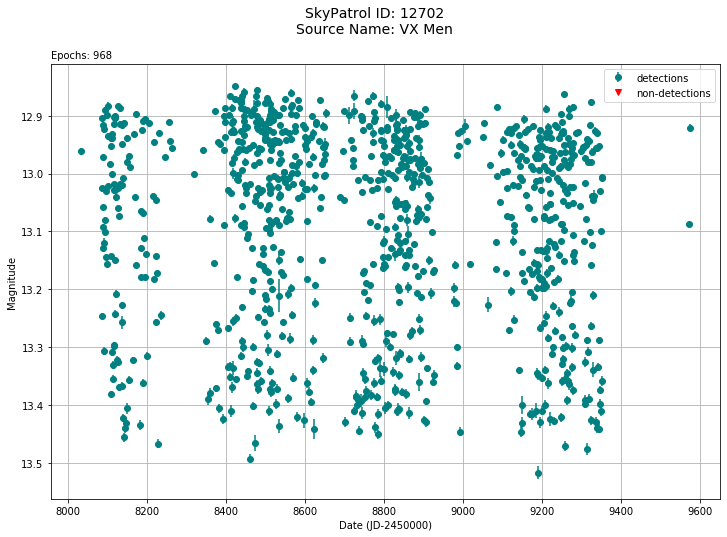

In [6]:
lightcurve.plot()

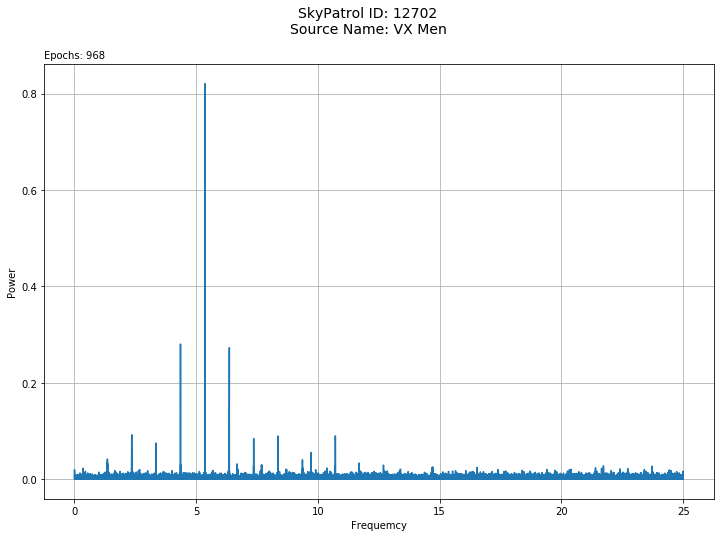

In [7]:
frequency, power, ls = lightcurve.lomb_scargle(plot=True)

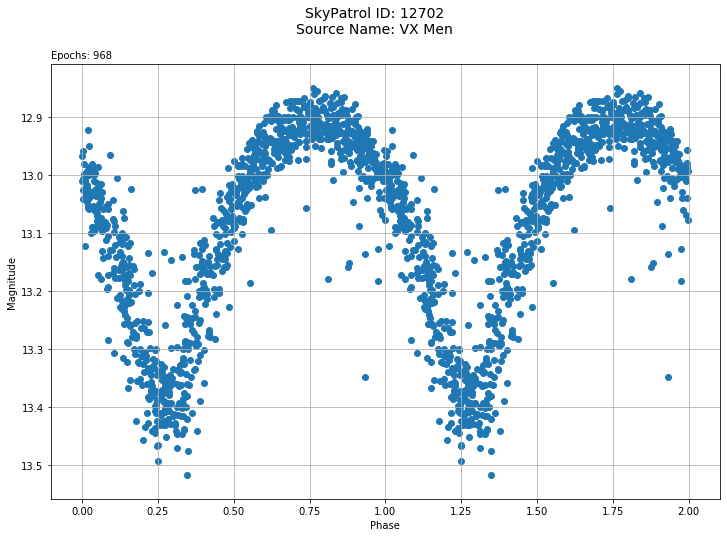

0.1866856418424789

In [8]:
lightcurve.find_period(frequency, power, plot=True)

#### Saving

Finally, we can save the individual light curve or the entire collection to .csv

In [20]:
# Individual
lightcurve.save(filename="vxmen.csv")
# Collection
lcs.save(save_dir="tmp/")